<a href="https://colab.research.google.com/github/vibhuvanjari-Kellogg/regression-modeling-HousePrices/blob/main/Mod_1_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

Link to access this code - https://colab.research.google.com/drive/1gKRrXN0jYrheIwl3eefoSEj9gh3FwewI#scrollTo=OvyyD8iORVMK

Data taken from - https://www.kaggle.com/c/house-prices-advanced-regression-techniques/

Houses in Ames, Iowa

Objective:

1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.
2. Investigate missing data and outliers.
3. Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.
4. Engage in feature creation by splitting, merging, or otherwise generating a new predictor.
5. Using the dependent variable, perform both min-max and standard scaling in Python.

### Upload all data and modules


In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# to ensure all columns are displayed when calling data
pd.set_option('display.max_columns', None)

### Load data and analyze

#### Load data

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1         NaN   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [ ]:
# define a variable to show info() + levels information for categorical variables
def extended_info(df):
    df.info()

    # Add categorical levels information
    print("\nCategorical Levels:")
    for col in df.select_dtypes(include=['object']).columns:
        num_levels = df[col].nunique()
        print(f"  {col}: {num_levels} levels")

extended_info(df_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Analysis of missing data part 1

I believe the following features have too few observations to work with and should be investigated further.

*   Alley - "NA" implies no alley access, not missing data
*   MasVnrType - Related to MasVnrArea, in most cases if Area is 0 MasVnrType is "None" (there are a few exceptions). There are 8 entries with "NA" that correspond to MasVnrArea "NA"
*   FireplaceQu - could be related to Fireplaces
*   PoolQC - could be related to PoolArea
*   Fence - "NA" implies no fence, not missing data
*   MiscFeature - "NA" implies no miscellaneous features, not missing data





##### Analysis of missing Alley data
**TAKEAWAY:** best to exclude "Alley" from further analysis.

In [ ]:
# does having an alley impact SalePrice?
df_train['Alley'] = df_train['Alley'].fillna('NA')
df_train.groupby('Alley')['SalePrice'].agg(['mean', 'median', 'min', 'max', 'count'])

mean    median    min     max  count
Alley                                               
Grvl   122219.080000  119500.0  52500  256000     50
NA     183452.131483  165000.0  34900  755000   1369
Pave   168000.585366  172500.0  40000  265979     41

Only homes without an Alley have a chance of being ultra-luxury houses crossing the $300k threshold. This makes sense as suburbs where houses are spaced apart likely have a lot of space and don't need an alley. However, considering that the mean and median are somewhat on par with Alley type "Pave" we can conclude that the ultra-luxury houses could be an outlier and most houses fall under the "NA" category.

In [ ]:
sns.violinplot(x='Alley', y='SalePrice', data=df_train)
plt.title('Violin Plot of SalePrice vs Alley Type')
plt.xlabel('Alley Type')
plt.ylabel('SalePrice')
plt.show()

The median house with no alley sits between gravel and paved houses. However, houses with alleys don't really cross the $300k threshold. This represents the outlier ultra high end houses that are probably in a suburb and spaced really far from each other not requiring alleys.

In [ ]:
filtered_df = df_train[(df_train['Alley'] == 'NA') & (df_train['SalePrice'] > 300000)]
num_houses = len(filtered_df)
percentage1 = (num_houses / len(df_train)) * 100
print(f"Number of no alley houses worth more than $300k : {num_houses}, these correspond to {percentage1:.2f}% of all houses.")

gravel_count = df_train['Alley'].value_counts()['Grvl']
pave_count = df_train['Alley'].value_counts()['Pave']

# Print the results
print(f"Number of houses with gravel alley: {gravel_count}")
print(f"Number of houses with paved alley: {pave_count}")

Number of no alley houses worth more than $300k : 115, these correspond to 7.88% of all houses.
Number of houses with gravel alley: 50
Number of houses with paved alley: 41


The above is further evidence that a small portion of houses have alleys.

**TAKEAWAY:** might be best to exclude "Alley" from further analysis.

##### Analysis of missing MasVnrType data

**TAKEAWAY 1:** Add an interaction variable between MasVnrType and MasVnrArea into the analysis if using regression models.

**TAKEAWAY 2:** There are 4 inconsistent entries where MasVnrArea is not 0 when MasVnrType is None. Something to note for later.

**TAKEAWAY 3:** there are 8 entires where MasVnrArea and MasVnrType are NA, for consistency these will be modified to be 0 and None respectively.

In [ ]:
# does having an MasVnrType impact SalePrice?
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('NA')
df_train.groupby('MasVnrType')['SalePrice'].agg(['mean', 'median', 'min', 'max', 'count'])

mean    median     min     max  count
MasVnrType                                                
BrkCmn      146318.066667  139000.0   89471  277000     15
BrkFace     204691.871910  181000.0   75000  755000    445
NA          156958.243119  143125.0   34900  745000    872
Stone       265583.625000  246839.0  119000  611657    128

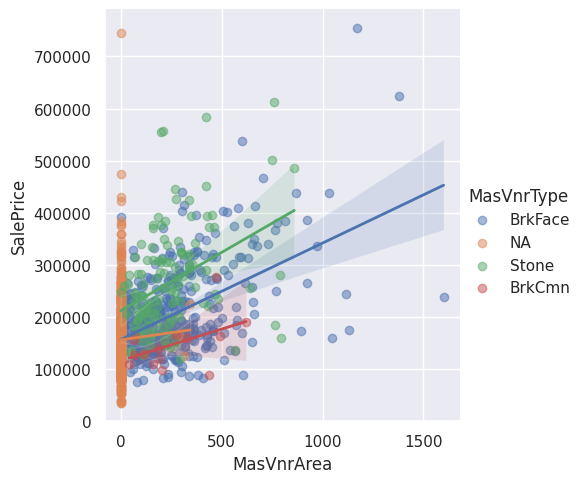

In [ ]:
# does having an MasVnrArea impact SalePrice?
sns.lmplot(x='MasVnrArea', y='SalePrice', hue='MasVnrType', data=df_train,
           scatter_kws={'alpha': 0.5},
           line_kws={'linewidth': 2})

# Set the y-axis limits using Matplotlib
plt.ylim(0, None)

# Display the plot
plt.show()

**TAKEAWAY:** The MasVnrType changes the strength and direction of the correlation between MasVnrArea and SalePrice. It might be best to add an interaction variable into the analysis.

##### Analysis of missing Fireplace QC

**TAKEAWAY:** modify Fireplace QC column to accurate represent "NA" columns as homes with "NF" (no fireplaces) as this has an impact on SalesPrice.



In [ ]:
# does "FireplaceQu" impact SalePrice?
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('NA')
df_train.groupby('FireplaceQu')['SalePrice'].agg(['mean', 'median', 'min', 'max', 'count']).sort_values(by=['median'], ascending=False)

mean    median     min     max  count
FireplaceQu                                                
Ex           337712.500000  314250.0  130500  755000     24
Gd           226351.415789  206950.0   90350  611657    380
TA           205801.128205  187500.0   82500  745000    312
Fa           167298.484848  158000.0  117000  262000     33
NA           141389.613603  135000.0   34900  342643    691
Po           129764.150000  131500.0   60000  172000     20

In [ ]:
# checking number of Fireplaces when FireplaceQu is "NA"
filtered_df = df_train[df_train['FireplaceQu'] == 'NA']
average_fireplaces = filtered_df['Fireplaces'].mean()
print(f"Average Fireplaces when FirepalceQu is NA: {average_fireplaces}")

Average Fireplaces when FirepalceQu is NA: 0.001447178002894356


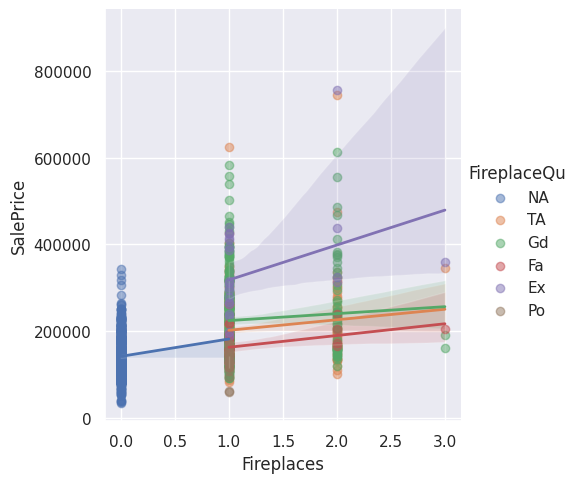

In [ ]:
sns.lmplot(x='Fireplaces', y='SalePrice', hue='FireplaceQu', data=df_train,
           scatter_kws={'alpha': 0.5},  # Adjust transparency of scatter points
           line_kws={'linewidth': 2});  # Adjust line width

**TAKEAWAY:** Even with the low number of samples, homes with better quality fireplaces sell at a significantly higher price. Poor quality fireplace homes sell at a lower price than homes with no fireplaces. Best to accurately reflect "NF" (no fireplaces) in the "FireplaceQu" column.

In [ ]:
# Replace 'NA' with 'NF' in the 'FireplaceQu' column
df_train['FireplaceQu'] = df_train['FireplaceQu'].replace('NA', 'NF')
df_train.groupby('FireplaceQu')['SalePrice'].agg(['mean', 'median', 'min', 'max', 'count']).sort_values(by=['median'], ascending=False)

mean    median     min     max  count
FireplaceQu                                                
Ex           337712.500000  314250.0  130500  755000     24
Gd           226351.415789  206950.0   90350  611657    380
TA           205801.128205  187500.0   82500  745000    312
Fa           167298.484848  158000.0  117000  262000     33
NF           141389.613603  135000.0   34900  342643    691
Po           129764.150000  131500.0   60000  172000     20

##### Analysis of missing PoolQC data

**TAKEAWAY:** best to exclude "PoolQC" from further analysis.



In [ ]:
# does "PoolQC" impact SalePrice?
df_train['PoolQC'] = df_train['PoolQC'].fillna('NA')
df_train.groupby('PoolQC')['SalePrice'].agg(['mean', 'median', 'min', 'max', 'count'])

mean    median     min     max  count
PoolQC                                                
Ex      490000.000000  490000.0  235000  745000      2
Fa      215500.000000  215500.0  181000  250000      2
Gd      201990.000000  171000.0  160000  274970      3
NA      180404.663455  162900.0   34900  755000   1453

In [ ]:
# checking average PoolArea when PoolQC is "NA"
filtered_df = df_train[df_train['PoolQC'] == 'NA']
average_pool_area = filtered_df['PoolArea'].mean()
print(f"Average Pool Area when PoolQC is NA: {average_pool_area}")

Average Pool Area when PoolQC is NA: 0.0


**TAKEAWAY:** most homes, don't have a pool might be best to exclude. PoolQC variable will also partially be captured in PoolArea, as when PoolQC is NA, PoolArea is 0.

##### Analysis of missing Fence data

**TAKEAWAY:** best to exclude "Fence" from further analysis.



In [ ]:
# does having a fence impact SalePrice?
df_train['Fence'] = df_train['Fence'].fillna('NA')
df_train.groupby('Fence')['SalePrice'].agg(['mean', 'median', 'min', 'max', 'count'])

mean    median     min     max  count
Fence                                                
GdPrv  178927.457627  167500.0  108000  475000     59
GdWo   140379.314815  138750.0   34900  381000     54
MnPrv  148751.089172  137450.0   40000  745000    157
MnWw   134286.363636  130000.0  110000  187000     11
NA     187596.837998  173000.0   35311  755000   1179

**TAKEAWAY:** since the percentage of missing values is high, it is best to drop this feature.

##### Analysis of missing MiscFeature data

**TAKEAWAY:** best to exclude "MiscFeature" from further analysis.



In [ ]:
miscfeature_na_count = df_train['MiscFeature'].isna().sum()
miscfeature_na_percentage = (miscfeature_na_count / len(df_train)) * 100
print(f"Number of missing values in 'MiscFeature': {miscfeature_na_count}")
print(f"Percentage of missing values: {miscfeature_na_percentage:.2f}%")

Number of missing values in 'MiscFeature': 1406
Percentage of missing values: 96.30%


**TAKEAWAY:** since the percentage of missing values is high, it is best to drop this feature.

### Clean up data

#### Cleaning up data as per analysis of missing data part 1

In [ ]:
# reloading data from csvs
df_train_original = pd.read_csv('train.csv')
df_test_original = pd.read_csv('test.csv')

In [ ]:
# reloading train and test data
df_train = df_train_original.copy()
df_test = df_test_original.copy()

# removing Alley, PoolQC, Fence, MiscFeature
df_train = df_train_original.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
df_test = df_test_original.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

# modifying FireplaceQu missing values to indicate "NF" or no fireplace
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('NF')
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna('NF')

In [ ]:
# modifying MasVnrArea and MasVnrType missing values to indicate "0" and "None" respectively, this is an assumption.
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
df_test['MasVnrType'] = df_test['MasVnrType'].fillna('None')
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)

In [ ]:
extended_info(df_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

There seems to be a big set of missing data related to basements and garages, this can be investigated next.

#### Analysis and cleanup of garage related data

**Assumption:** if GarageArea is 0, there is no garage.

In [ ]:
# Check how many observations have GarageArea = 0, and make a dataset
df_GarageArea_0 = df_train[df_train['GarageArea'] == 0]
len(df_GarageArea_0)

81

In [ ]:
# Check how many values GarageType, GarageYrBlt, GarageFinish, GarageQual and GarageCond are not null when GarageArea is 0
df_GarageArea_0['GarageType'].notnull().sum() + df_GarageArea_0['GarageYrBlt'].notnull().sum() + df_GarageArea_0['GarageFinish'].notnull().sum() + df_GarageArea_0['GarageQual'].notnull().sum() + df_GarageArea_0['GarageCond'].notnull().sum()

np.int64(0)

The above check confirms that when GarageArea is 0, data for GarageType, GarageYrBlt, GarageFinish, GarageQual and GarageCond is missing.

In [ ]:
# do the same for test data
df_GarageArea_0 = df_test[df_test['GarageArea'] == 0]
len(df_GarageArea_0)

76

In [ ]:
df_GarageArea_0['GarageType'].notnull().sum() + df_GarageArea_0['GarageYrBlt'].notnull().sum() + df_GarageArea_0['GarageFinish'].notnull().sum() + df_GarageArea_0['GarageQual'].notnull().sum() + df_GarageArea_0['GarageCond'].notnull().sum()

np.int64(0)

Even in test data this information is missing.

In [ ]:
# When GarageArea is 0 categorical variables GarageType, GarageFinish, GarageQual and GarageCond should be set to "NG" to indicate "No Garage"
columns_to_update = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df_train.loc[df_train['GarageArea'] == 0, columns_to_update] = 'NG'
df_test.loc[df_test['GarageArea'] == 0, columns_to_update] = 'NG'

# When GarageArea is 0 set GarageYrBlt to 0
df_train.loc[df_train['GarageArea'] == 0, 'GarageYrBlt'] = 0
df_test.loc[df_test['GarageArea'] == 0, 'GarageYrBlt'] = 0

#### Analysis and cleanup of basement related data


There are 9 features related to basements. BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF

Out of these features, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF and TotalBsmtSF have no missing data. These also happen to be the continuous/numerical features.

For the categorical variables, missing data doesn't indicate missing data but rather lack of a basement so this needs to be represented accurately.

**ASSUMPTION:** BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF = TotalBsmtSF

**NOTE:** BsmtExposure has one extra missing data cell than the rest of the categorical features, this must be investigated further. Needs further investigation.

**ASSUMPTION:** If TotalBsmtSF is 0 then categorical variables should indicate no basement.




In [ ]:
# verify that BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF = TotalBsmtSF for all rows
df_train['TotalBsmtSF_check'] = df_train['BsmtFinSF1'] + df_train['BsmtFinSF2'] + df_train['BsmtUnfSF']
df_train['TotalBsmtSF_check'].equals(df_train['TotalBsmtSF'])

True

In [ ]:
# do the same for test
df_test['TotalBsmtSF_check'] = df_test['BsmtFinSF1'] + df_test['BsmtFinSF2'] + df_test['BsmtUnfSF']
df_test['TotalBsmtSF_check'].equals(df_test['TotalBsmtSF'])

True

In [ ]:
df_train = df_train.drop('TotalBsmtSF_check', axis=1)
df_test = df_test.drop('TotalBsmtSF_check', axis=1)

In [ ]:
# find the data rows that has missing BsmTExpsoure but all other data is present
df_train[df_train['BsmtExposure'].isna() & df_train['BsmtFinType1'].notna()]


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
948  949          60       RL         65.0    14006   Pave      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
948         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
948       Norm     1Fam     2Story            7            5       2002   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
948          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
948       144.0        Gd        TA      PConc       Gd       TA          NaN   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
948          Unf           0          Unf           0        936          936   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
948    GasA        Ex          Y      SBrkr       936       840             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
948       1776             0             0         2         1             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
948             1          Gd             7        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
948          TA     Attchd       2002.0          RFn           2         474   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
948         TA         TA          Y         144           96              0   

     3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType  \
948          0            0         0        0       2    2006       WD   

    SaleCondition  SalePrice  
948        Normal     192500

There is some inconsistency with this row of data. The correct BsmtExpsoure value should be No (No Exposure) instead of NA (No Basement), because all other Basement features indicate that there is a basement.

In [ ]:
# do the same for test
df_test[df_test['BsmtExposure'].isna() & df_test['BsmtFinType1'].notna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
27   1488          20       RL         73.0     8987   Pave      Reg   
888  2349          60       FV         81.0    10411   Pave      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
27          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
888         Lvl    AllPub    Corner       Gtl      Somerst       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
27        Norm     1Fam     1Story            8            5       2005   
888       Norm     1Fam     2Story            5            5       2007   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
27           2006     Gable  CompShg     VinylSd     VinylSd    BrkFace   
888          2007     Gable  CompShg     VinylSd     VinylSd       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
27        226.0        Gd        TA      PConc       Gd       TA          NaN   
888         0.0        Gd        TA     CBlock       Gd       TA          NaN   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
27           Unf         0.0          Unf         0.0     1595.0       1595.0   
888          Unf         0.0          Unf         0.0      725.0        725.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
27     GasA        Ex          Y      SBrkr      1595         0             0   
888    GasA        Ex          Y      SBrkr       725       863             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
27        1595           0.0           0.0         2         0             2   
888       1588           0.0           0.0         3         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
27              1          Gd             6        Typ           1   
888             1          Gd             8        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
27           Gd     Attchd       2005.0          RFn         3.0       880.0   
888          NF     Attchd       2007.0          Unf         2.0       561.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
27          TA         TA          Y         144            0              0   
888         TA         TA          Y           0            0              0   

     3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType  \
27           0            0         0        0       5    2010       WD   
888          0            0         0        0       7    2007      New   

    SaleCondition  
27         Normal  
888       Partial

In [ ]:
# find "Id" values for these rows
id_values = df_train.loc[df_train['BsmtExposure'].isna() & df_train['BsmtFinType1'].notna(), 'Id'].tolist()
print(id_values)

[949]


In [ ]:
# edit this data to fix inconsistency
for id_val in id_values:
    df_train.loc[df_train['Id'] == id_val, 'BsmtExposure'] = "No"

In [ ]:
# check row
df_train[df_train['Id'] == 949]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
948  949          60       RL         65.0    14006   Pave      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
948         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
948       Norm     1Fam     2Story            7            5       2002   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
948          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
948       144.0        Gd        TA      PConc       Gd       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
948          Unf           0          Unf           0        936          936   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
948    GasA        Ex          Y      SBrkr       936       840             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
948       1776             0             0         2         1             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
948             1          Gd             7        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
948          TA     Attchd       2002.0          RFn           2         474   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
948         TA         TA          Y         144           96              0   

     3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType  \
948          0            0         0        0       2    2006       WD   

    SaleCondition  SalePrice  
948        Normal     192500

In [ ]:
# do the same for test data
id_values = df_test.loc[df_test['BsmtExposure'].isna() & df_test['BsmtFinType1'].notna(), 'Id'].tolist()
print(id_values)

# edit this data to fix inconsistency
for id_val in id_values:
    df_test.loc[df_test['Id'] == id_val, 'BsmtExposure'] = "No"


[1488, 2349]


In [ ]:
# check rows
df_test[df_test['Id'] == 1488]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
27  1488          20       RL         73.0     8987   Pave      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
27         Lvl    AllPub    Inside       Gtl      Somerst       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
27       Norm     1Fam     1Story            8            5       2005   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
27          2006     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
27       226.0        Gd        TA      PConc       Gd       TA           No   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
27          Unf         0.0          Unf         0.0     1595.0       1595.0   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
27    GasA        Ex          Y      SBrkr      1595         0             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
27       1595           0.0           0.0         2         0             2   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
27             1          Gd             6        Typ           1          Gd   

   GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
27     Attchd       2005.0          RFn         3.0       880.0         TA   

   GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
27         TA          Y         144            0              0          0   

    ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  
27            0         0        0       5    2010       WD        Normal

In [ ]:
df_test[df_test['Id'] == 2349]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
888  2349          60       FV         81.0    10411   Pave      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
888         Lvl    AllPub    Corner       Gtl      Somerst       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
888       Norm     1Fam     2Story            5            5       2007   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
888          2007     Gable  CompShg     VinylSd     VinylSd       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
888         0.0        Gd        TA     CBlock       Gd       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
888          Unf         0.0          Unf         0.0      725.0        725.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
888    GasA        Ex          Y      SBrkr       725       863             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
888       1588           0.0           0.0         3         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
888             1          Gd             8        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
888          NF     Attchd       2007.0          Unf         2.0       561.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
888         TA         TA          Y           0            0              0   

     3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType  \
888          0            0         0        0       7    2007      New   

    SaleCondition  
888       Partial

In [ ]:
# When TotalBsmtSF is 0 categorical variables BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 should be set to "NB" to indicate "No Basement"
columns_to_update = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df_train.loc[df_train['TotalBsmtSF'] == 0, columns_to_update] = 'NB'
df_test.loc[df_test['TotalBsmtSF'] == 0, columns_to_update] = 'NB'

#### Checking data again for more missing observations

In [ ]:
extended_info(df_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In training data there is considerable missing data for LotFrontage. One missing data for each of Electrical and BsmtFinType2.

##### Handling missing Electrical data

In [ ]:
# investigate
df_train.groupby('Electrical')['SalePrice'].agg(['mean', 'median', 'min', 'max', 'count'])

mean    median    min     max  count
Electrical                                               
FuseA       122196.893617  121250.0  34900  239000     94
FuseF       107675.444444  115000.0  39300  169500     27
FuseP        97333.333333   82000.0  73000  137000      3
Mix          67000.000000   67000.0  67000   67000      1
SBrkr       186825.113193  170000.0  37900  755000   1334

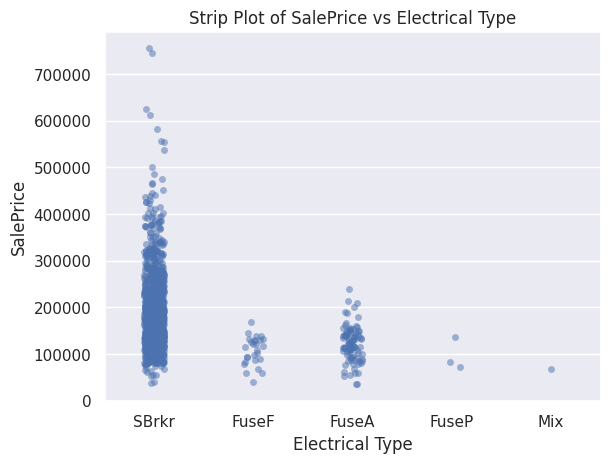

In [ ]:
sns.stripplot(x='Electrical', y='SalePrice', data=df_train, jitter=True, alpha=0.5)
plt.title('Strip Plot of SalePrice vs Electrical Type')
plt.xlabel('Electrical Type')
plt.ylabel('SalePrice')
plt.show()

Considering that there are mostly SBrkr houses, let's make the assumption that the missing data is also Electrical type SBrkr.

In [ ]:
# modifying Electrical missing values to indicate "SBrkr"
df_train['Electrical'] = df_train['Electrical'].fillna('SBrkr')
df_test['Electrical'] = df_test['Electrical'].fillna('SBrkr')

##### Handling missing BsmtFinType2 data

In [ ]:
# finding row with missing data
df_train[df_train['BsmtFinType2'].isna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
332  333          20       RL         85.0    10655   Pave      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
332         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
332       Norm     1Fam     1Story            8            5       2003   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
332          2004     Gable  CompShg     VinylSd     VinylSd    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
332       296.0        Gd        TA      PConc       Gd       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
332          GLQ        1124          NaN         479       1603         3206   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
332    GasA        Ex          Y      SBrkr      1629         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
332       1629             1             0         2         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
332             1          Gd             7        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
332          Gd     Attchd       2003.0          RFn           3         880   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
332         TA         TA          Y           0            0              0   

     3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType  \
332          0            0         0        0      10    2009       WD   

    SaleCondition  SalePrice  
332        Normal     284000

There is a basement here, just missing the BsmtFinType2 data.

In [ ]:
# investigate
df_train.groupby('BsmtFinType2')['SalePrice'].agg(['mean', 'median', 'min', 'max', 'count'])

mean    median     min     max  count
BsmtFinType2                                                
ALQ           209942.105263  174900.0  123500  555000     19
BLQ           151101.000000  143000.0   62383  271900     33
GLQ           180982.142857  203125.0   75500  270000     14
LwQ           164364.130435  154000.0   88000  287000     46
NB            105652.891892  101800.0   39300  198500     37
Rec           164917.129630  148750.0   85000  402000     54
Unf           184694.690287  167000.0   34900  755000   1256

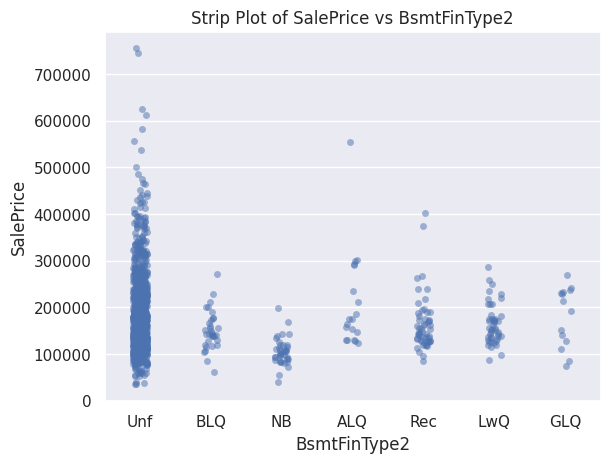

In [ ]:
sns.stripplot(x='BsmtFinType2', y='SalePrice', data=df_train, jitter=True, alpha=0.5)
plt.title('Strip Plot of SalePrice vs BsmtFinType2')
plt.xlabel('BsmtFinType2')
plt.ylabel('SalePrice')
plt.show()

Considering that there are mostly Unf houses, let's make the assumption that the missing data is also BsmtFinType2 Unf.

In [ ]:
# modifying BsmtFinType2 missing values to indicate "Unf"
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna('Unf')
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna('Unf')

##### Handling missing LotFrontage data

Only 1201/1460 samples have LotFrontage listed. LotFrontage could be correlated with LotArea.

**TAKEAWAY:** Exclude LotFrontage from dataset, LotArea will capture most of this effect.

In [ ]:
# investigate
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.117123   443.639726   
std       1.112799    30.202904     20.645407   180.731373   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   164.250000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1868.739726     1.767123   472.980137    94.244521    46.660274   
std     453.697295     0.747315   213.804841   125.338794    66.256028   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%    1958.000000     1.000000   334.500000     0.000000     0.000000   
50%    1977.000000     2.000000   480.000000     0.000000    25.000000   
75%    2001.000000     2.000000   576.000000   168.000000    68.000000   
max    2

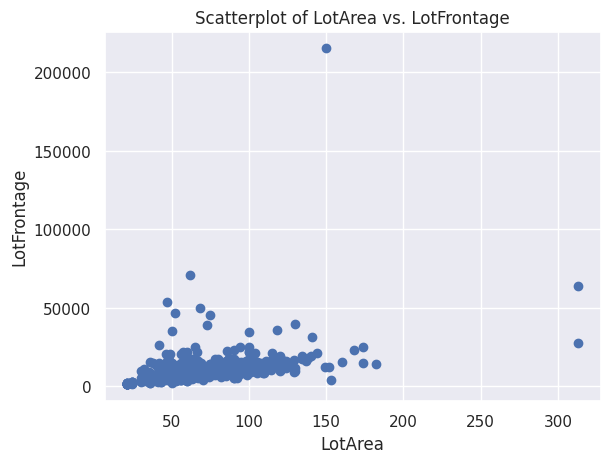

In [ ]:
plt.scatter(df_train['LotFrontage'], df_train['LotArea'])
plt.xlabel('LotArea')  # Label for the x-axis
plt.ylabel('LotFrontage') # Label for the y-axis
plt.title('Scatterplot of LotArea vs. LotFrontage') # Title of the plot
plt.show()

There are a lot of outliers, let's limit data to 2 St Devs from median.

In [ ]:
#filtered_df includes data that is 2 StDevs from mean for each of LotFrontage, LotArea and SalePrice

# Calculate the mean and standard deviation for each column
lot_frontage_mean = df_train['LotFrontage'].mean()
lot_frontage_std = df_train['LotFrontage'].std()
lot_area_mean = df_train['LotArea'].mean()
lot_area_std = df_train['LotArea'].std()
sale_price_mean = df_train['SalePrice'].mean()
sale_price_std = df_train['SalePrice'].std()

# Create the filtered DataFrame
filtered_df = df_train[
    (df_train['LotFrontage'] >= lot_frontage_mean - 2 * lot_frontage_std) &
    (df_train['LotFrontage'] <= lot_frontage_mean + 2 * lot_frontage_std) &
    (df_train['LotArea'] >= lot_area_mean - 2 * lot_area_std) &
    (df_train['LotArea'] <= lot_area_mean + 2 * lot_area_std) &
    (df_train['SalePrice'] >= sale_price_mean - 2 * sale_price_std) &
    (df_train['SalePrice'] <= sale_price_mean + 2 * sale_price_std)
]


In [ ]:
plt.scatter(filtered_df['LotFrontage'], filtered_df['LotArea'])
plt.xlabel('LotArea')  # Label for the x-axis
plt.xlim (0,150)
plt.ylabel('LotFrontage') # Label for the y-axis
plt.ylim (0,30000)
plt.title('Scatterplot of LotArea vs. LotFrontage') # Title of the plot
plt.show()

In [ ]:
correlation = df_train['LotFrontage'].corr(df_train['LotArea'])
print(correlation)

0.42609501877180833


In [ ]:
correlation = filtered_df['LotFrontage'].corr(filtered_df['LotArea'])
print(correlation)

0.5935208365539371


In [ ]:
sns.pairplot(filtered_df[['LotArea', 'LotFrontage', 'SalePrice']], kind='reg', diag_kind='kde')
plt.show()

In [ ]:
len(filtered_df)

1080

Excluding the outliers, the correlation imporves significantly.

**TAKEAWAY:** Exclude LotFrontage from dataset, LotArea will capture most of this effect.

In [ ]:
# removing LotFrontage
df_train = df_train.drop(['LotFrontage'], axis=1)
df_test = df_test.drop(['LotFrontage'], axis=1)

extended_info(df_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

#### Data is now clean

#### Creating a list of categorical data types

In [ ]:
categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [ ]:
len(categorical_features)

39

#### Creating a list of numeric data types

In [ ]:
numeric_features = df_train.select_dtypes(include=['number']).columns.tolist()
print(numeric_features)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [ ]:
len(numeric_features)

37

In [ ]:
extended_info(df_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [ ]:
df_train.describe()

Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315   
std      30.202904     20.645407   180.731373   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014  1868.739726   
std        0.815778      0.220338      1.625393     0.644666   453.697295   
min        0.000000      0.000000      2.000000     0.000000     0.000000   
25%        2.000000      1.000000      5.000000     0.000000  1958.000000   
50%        3.000000      1.000000      6.000000     1.000000  1977.000000   
75%        3.000000      1.000000      7.000000     1.000000  2001.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000       0.00

In [ ]:
df_test.describe()

Id   MSSubClass       LotArea  OverallQual  OverallCond  \
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000   
mean   2190.000000    57.378341   9819.161069     6.078821     5.553804   
std     421.321334    42.746880   4955.517327     1.436812     1.113740   
min    1461.000000    20.000000   1470.000000     1.000000     1.000000   
25%    1825.500000    20.000000   7391.000000     5.000000     5.000000   
50%    2190.000000    50.000000   9399.000000     6.000000     5.000000   
75%    2554.500000    70.000000  11517.500000     7.000000     6.000000   
max    2919.000000   190.000000  56600.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1459.000000   1459.000000  1459.000000  1458.000000  1458.000000   
mean   1971.357779   1983.662783    99.673749   439.203704    52.619342   
std      30.390071     21.130467   177.001792   455.268042   176.753926   
min    1879.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1953.000000   1963.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1992.000000     0.000000   350.500000     0.000000   
75%    2001.000000   2004.000000   162.000000   753.500000     0.000000   
max    2010.000000   2010.000000  1290.000000  4010.000000  1526.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1458.000000  1458.000000  1459.000000  1459.000000   1459.000000   
mean    554.294925  1046.117970  1156.534613   325.967786      3.543523   
std     437.260486   442.898624   398.165820   420.610226     44.043251   
min       0.000000     0.000000   407.000000     0.000000      0.000000   
25%     219.250000   784.000000   873.500000     0.000000      0.000000   
50%     460.000000   988.000000  1079.000000     0.000000      0.000000   
75%     797.750000  1305.000000  1382.500000   676.000000      0.000000   
max    2140.000000  5095.000000  5095.000000  1862.000000   1064.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1459.000000   1457.000000   1457.000000  1459.000000  1459.000000   
mean   1486.045922      0.434454      0.065202     1.570939     0.377656   
std     485.566099      0.530648      0.252468     0.555190     0.503017   
min     407.000000      0.000000      0.000000     0.000000     0.000000   
25%    1117.500000      0.000000      0.000000     1.000000     0.000000   
50%    1432.000000      0.000000      0.000000     2.000000     0.000000   
75%    1721.000000      1.000000      0.000000     2.000000     1.000000   
max    5095.000000      3.000000      2.000000     4.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
count   1459.000000   1459.000000   1459.000000  1459.00000  1457.000000   
mean       2.854010      1.042495      6.385195     0.58122  1874.559369   
std        0.829788      0.208472      1.508895     0.64742   440.656292   
min        0.000000      0.000000      3.000000     0.00000     0.000000   
25%        2.000000      1.000000      5.000000     0.00000  1956.000000   
50%        3.000000      1.000000      6.000000     0.00000  1977.000000   
75%        3.000000      1.000000      7.000000     1.00000  2001.000000   
max        6.000000      2.000000     15.000000     4.00000  2207.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1458.000000  1458.000000  1459.000000  1459.000000    1459.000000   
mean      1.766118   472.768861    93.174777    48.313914      24.243317   
std       0.775945   217.048611   127.744882    68.883364      67.227765   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   318.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    28.000000       0.000000   
75%       2.000000   576.000000   168.000000    72.000000       0.000000   
max       

### Visualizing variable distributions

#### Continuous variables

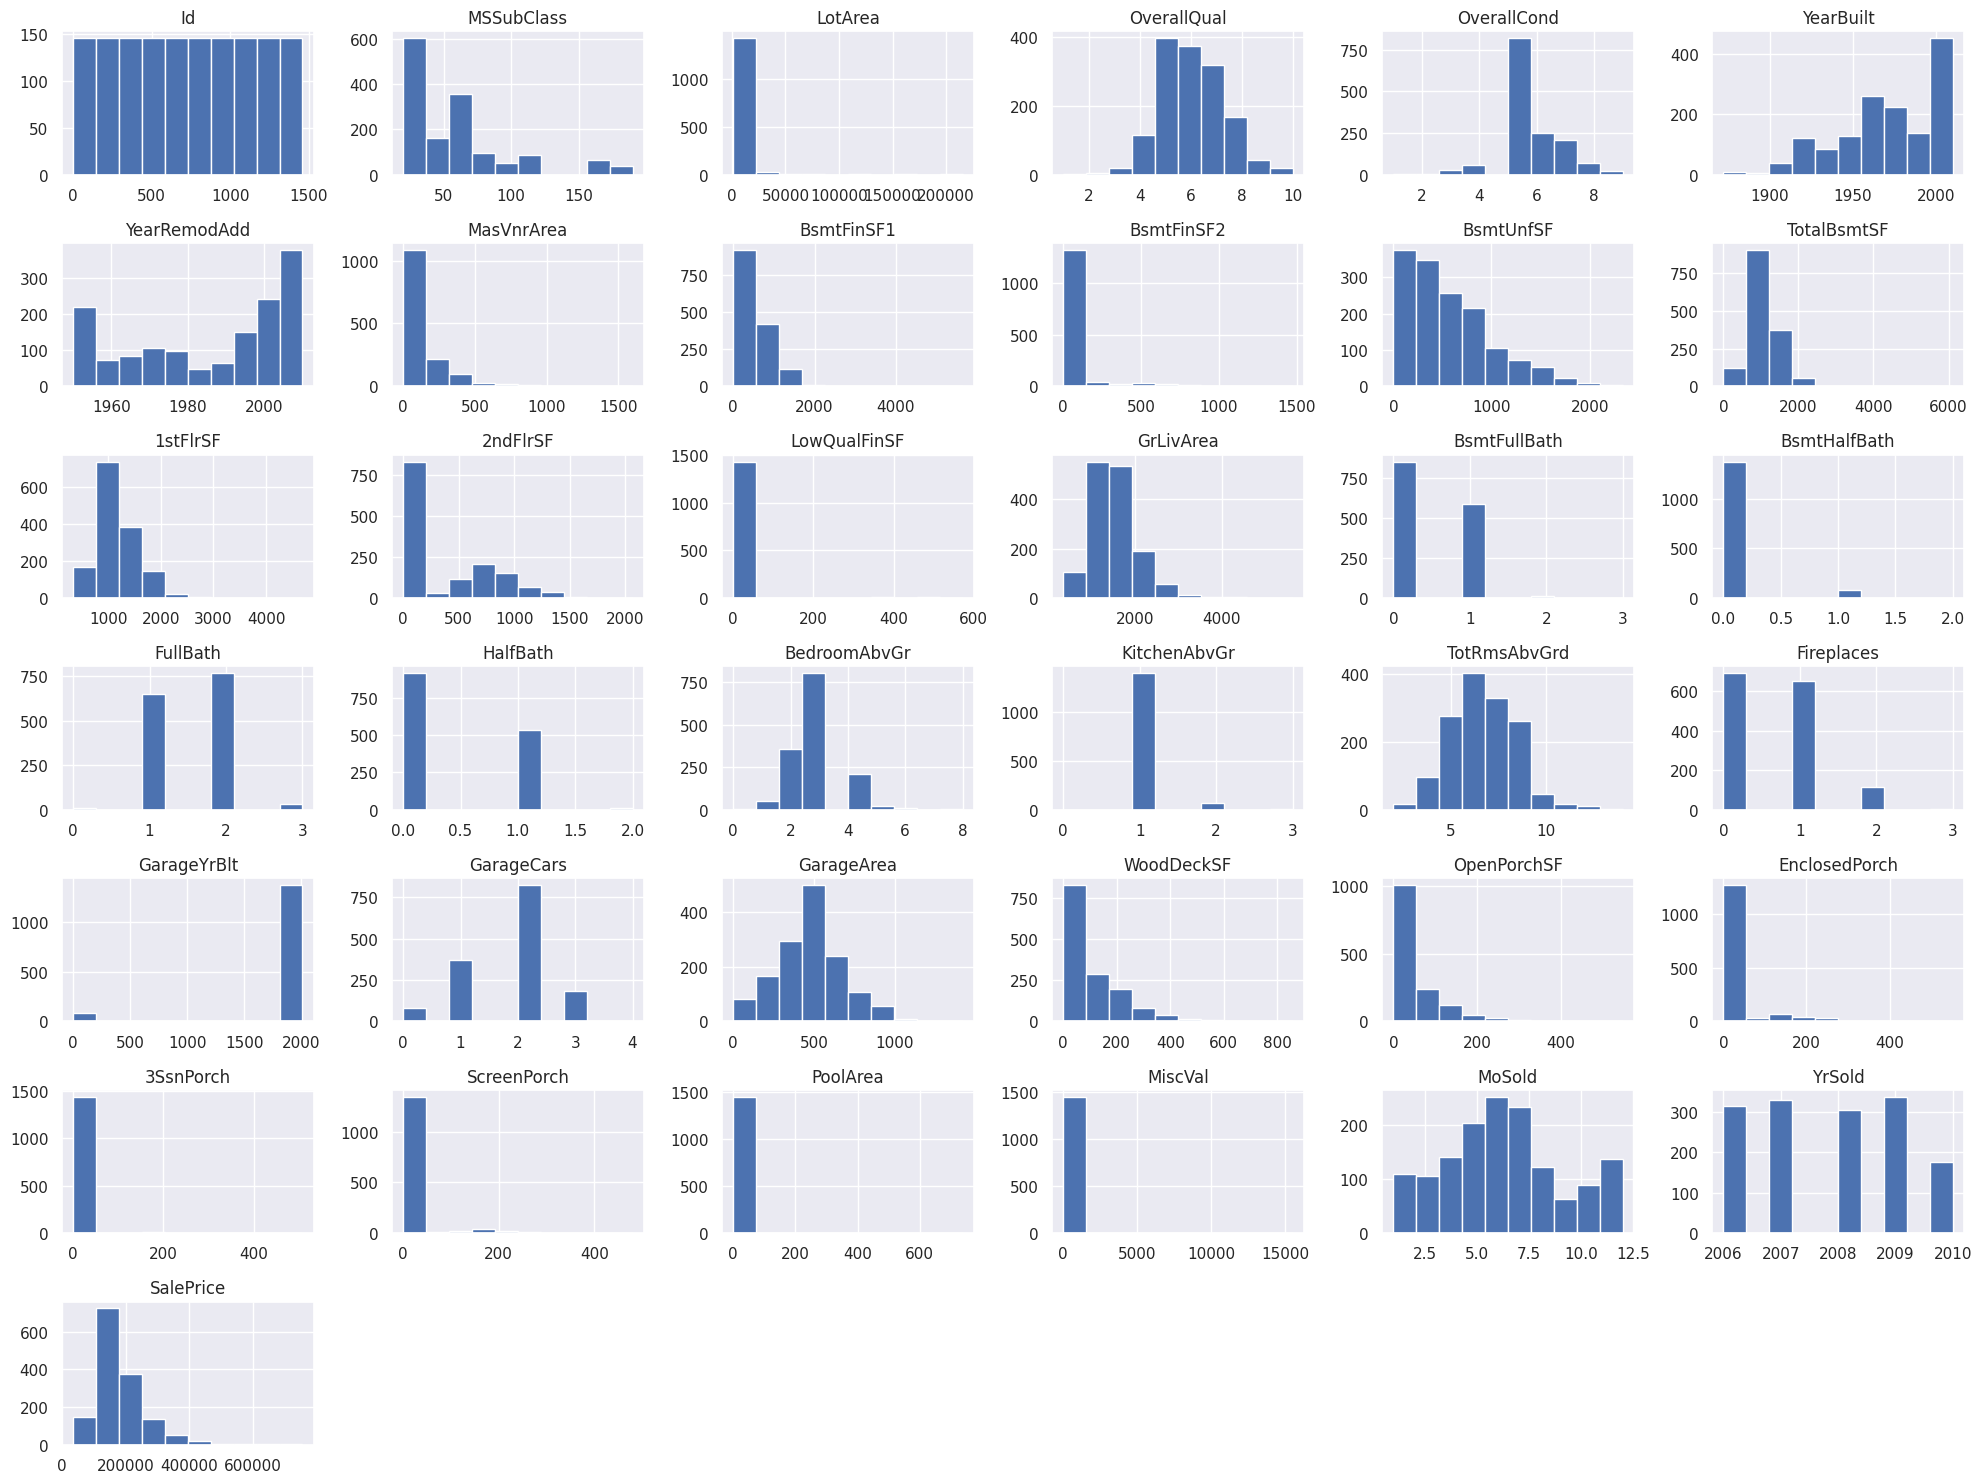

In [ ]:
%matplotlib inline
df_train.hist(bins=10, figsize=(20,15))
plt.tight_layout()
plt.show()

#### Categorical variables

In [ ]:
num_plots = len(categorical_features)
num_cols = 3  # Adjust as needed
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Handle NaN values (replace with 'Unknown' or remove rows)
for column in categorical_features:
    df_train[column] = df_train[column].fillna('Unknown')

In [ ]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize as needed

# Iterate and plot on subplots
for i, column in enumerate(categorical_features):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(x=column, data=df_train, ax=axes[row, col])
    axes[row, col].set_title(f"Countplot for {column}")
    axes[row, col].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

#### Correlations

In [ ]:
corr_matrix = df_train[numeric_features].corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [ ]:
# picking the variables with the highest correlations
from pandas.plotting import scatter_matrix
attributes = ["SalePrice","OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt" ]
scatter_matrix(df_train[attributes], figsize=(18, 12), diagonal='kde');

### Exploratory Data Analysis

#### Analysis of various square footage features
Investigation of how GrLivArea, TotalBsmtSF, 1stFlrSF and 2ndFlrSF correlate with each other and how they correlate with SalePrice

**Assumption:** GrLivArea = 1stFlrSF + 2ndFlrSF + LowQualFin SF

**TAKEAWAY:** TotalLivArea = GrLivArea + TotalBsmtSF is more strongly correlated with SalePrice than any individual square footage feature.

In [ ]:
# verify that 1stFlrSF + 2ndFlrSF = GrLivArea for all rows
df_train['GrLivArea_check'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['GrLivArea_check'].equals(df_train['GrLivArea'])

False

In [ ]:
count = df_train[(df_train['GrLivArea'] == (df_train['1stFlrSF'] + df_train['2ndFlrSF']))].shape[0]
print(f"Number of rows where GrLivArea = 1stFlrSF + 2ndFlrSF: {count}")

Number of rows where GrLivArea = 1stFlrSF + 2ndFlrSF: 1434


There could be an extra variable, this happens to be LowQualFinSF

In [ ]:
# verify that 1stFlrSF + 2ndFlrSF + LowQualFinSF = GrLivArea for all rows
df_train['GrLivArea_check'] = df_train['1stFlrSF'] + df_train['2ndFlrSF'] + df_train['LowQualFinSF']
df_train['GrLivArea_check'].equals(df_train['GrLivArea'])

True

In [ ]:
df_train = df_train.drop('GrLivArea_check', axis=1)

In [ ]:
# let's create another variable TotalLivArea = GrLivArea + TotalBsmtSF
df_train['TotalLivArea'] = df_train['GrLivArea'] + df_train['TotalBsmtSF']

In [ ]:
attributes = ["SalePrice","TotalLivArea", "GrLivArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF"]

corr_matrix = df_train[attributes].corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice       1.000000
TotalLivArea    0.778959
GrLivArea       0.708624
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
Name: SalePrice, dtype: float64

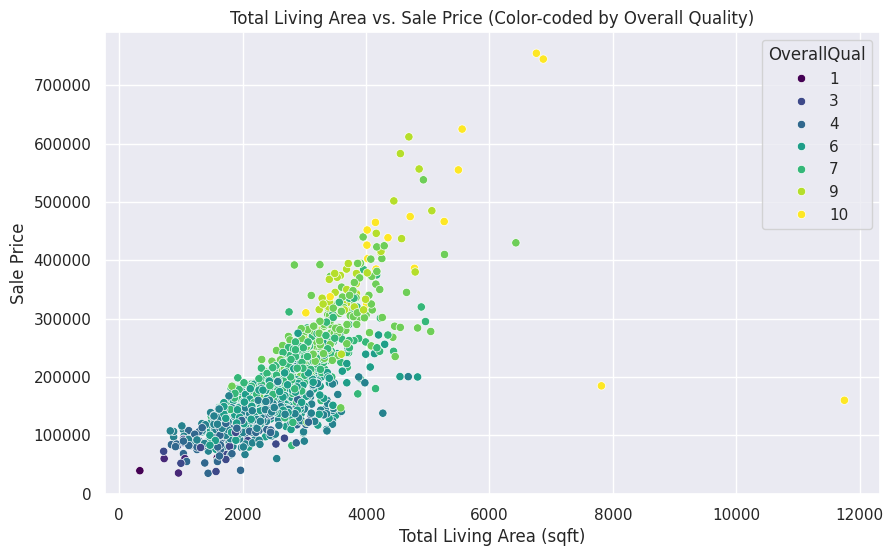

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='TotalLivArea', y='SalePrice', hue='OverallQual', data=df_train, palette='viridis')
plt.title('Total Living Area vs. Sale Price (Color-coded by Overall Quality)')
plt.xlabel('Total Living Area (sqft)')
plt.ylabel('Sale Price')
plt.show()

Larger homes tend to also have higher OverallQual

#### Larger homes tend to have higher quality

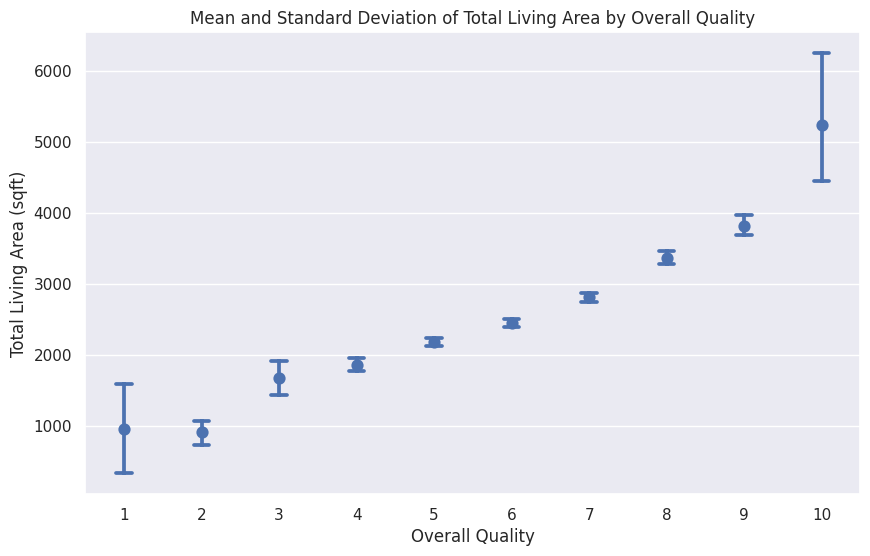

In [ ]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='OverallQual', y='TotalLivArea', data=df_train, linestyles='none', capsize=.2)  # Changed 'join' to 'linestyles'
plt.title('Mean and Standard Deviation of Total Living Area by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Total Living Area (sqft)')
plt.show()

#### Analysis of various number of bathrooms metrics
BsmtFullBath, BsmtHalfBath, FullBath, HalfBath


In [ ]:
df_train['TotalBaths'] = df_train['BsmtFullBath'] + (df_train['BsmtHalfBath']/2) + df_train['FullBath'] + (df_train['HalfBath']/2)

for feature in ["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "TotalBaths"]:
    correlation = df_train[feature].corr(df_train["SalePrice"])
    print(f"Correlation between {feature} and SalePrice: {correlation}")

Correlation between BsmtFullBath and SalePrice: 0.22712223313149382
Correlation between BsmtHalfBath and SalePrice: -0.016844154297359016
Correlation between FullBath and SalePrice: 0.5606637627484449
Correlation between HalfBath and SalePrice: 0.2841076755947831
Correlation between TotalBaths and SalePrice: 0.6317310679319873


#### Running a simple linear regression to evaluate which variables are most important

**TAKEAWAY:** Investigate neighborhood next

In [ ]:
df_model = pd.get_dummies(df_train, drop_first=True)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 249 entries, Id to SaleCondition_Partial
dtypes: bool(210), float64(3), int64(36)
memory usage: 744.4 KB


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split

X = df_model.drop('SalePrice', axis=1)  # All columns except 'SalePrice'
Y = df_model['SalePrice']

ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)  # Adjust alphas and cv as needed
ridge.fit(X, Y)

pd.set_option("display.max_rows", None)

print(pd.Series(ridge.coef_, index=X.columns).sort_values(key=abs, ascending=False))

Neighborhood_NoRidge     29907.188180
RoofMatl_WdShngl         29492.894325
Neighborhood_StoneBr     28957.875445
Condition2_PosN         -24720.756460
Neighborhood_NridgHt     23881.697049
KitchenQual_Gd          -19992.835392
BsmtQual_Gd             -18733.803441
KitchenQual_TA          -18258.581401
Neighborhood_Edwards    -16577.634315
BsmtExposure_Gd          15235.083676
BsmtQual_TA             -14847.525146
LotShape_IR3            -14055.390928
Neighborhood_Mitchel    -13753.571985
Neighborhood_Crawfor     13737.086000
LandContour_HLS          12829.715146
Exterior2nd_ImStucc      12823.020262
Exterior1st_BrkFace      12623.258308
GarageCars               12563.327877
ExterQual_TA            -12526.479825
LandContour_Lvl          12189.432340
KitchenQual_Fa          -11844.896270
Functional_Typ           11647.844319
OverallQual              10420.767137
Condition2_Norm          10270.068810
LotConfig_CulDSac        10264.963407
Condition1_Norm          10158.041716
Neighborhood

**TAKEAWAY:** Neighborhood seems to be very important.

#### Analysis of importance of neighborhood

In [ ]:
# To avoid TotalLivArea from impacting this analysis creat a feature called PricePerSqFt
df_train['PricePerSqFt'] = df_train['SalePrice']/df_train['TotalLivArea']

In [ ]:
plt.figure(figsize=(12, 8))  # Adjust size as needed
sns.boxplot(x='Neighborhood', y='PricePerSqFt', data=df_train)
plt.title('Price per Square Foot by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price per Square Foot')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

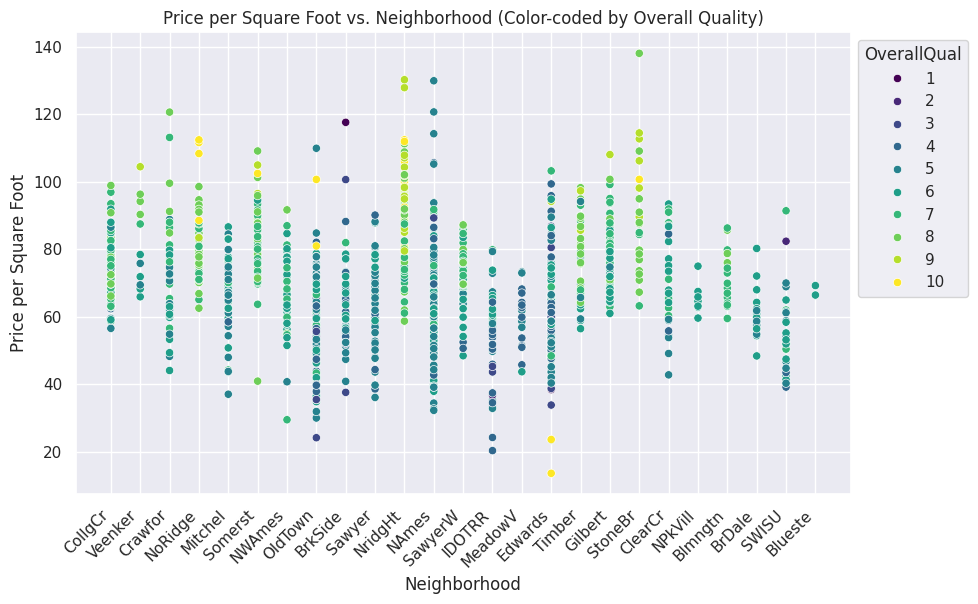

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Neighborhood', y='PricePerSqFt', hue='OverallQual', data=df_train, palette='viridis', legend = 'full') # Updated scatterplot
plt.title('Price per Square Foot vs. Neighborhood (Color-coded by Overall Quality)')
plt.xlabel('Neighborhood')
plt.ylabel('Price per Square Foot')
plt.xticks(rotation=45, ha='right')
sns.move_legend(plt.gca(), "upper left", bbox_to_anchor=(1, 1))
plt.show()

#### OverallQual vs OverallCond

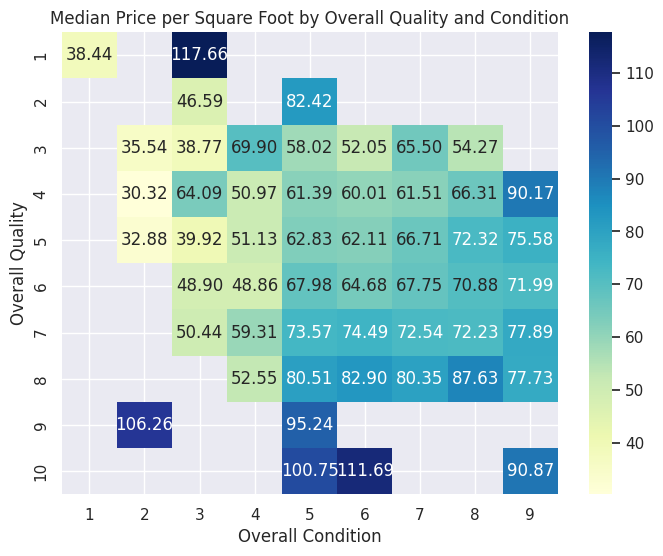

In [ ]:
# Calculate median PricePerSqFt by OverallQual and OverallCond
median_price_per_sqft = df_train.groupby(['OverallQual', 'OverallCond'])['PricePerSqFt'].median().reset_index()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pd.pivot_table(median_price_per_sqft, values='PricePerSqFt', index='OverallQual', columns='OverallCond'),
            annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Median Price per Square Foot by Overall Quality and Condition')
plt.xlabel('Overall Condition')
plt.ylabel('Overall Quality')
plt.show()

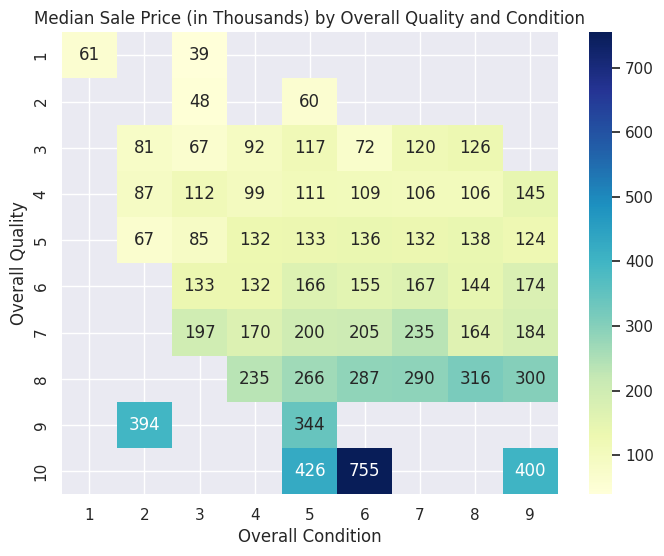

In [ ]:
# Calculate median SalePrice by OverallQual and OverallCond
median_sale_price = df_train.groupby(['OverallQual', 'OverallCond'])['SalePrice'].median().reset_index()

# Divide SalePrice by 1000 to display in thousands
median_sale_price['SalePrice'] = median_sale_price['SalePrice'] / 1000

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pd.pivot_table(median_sale_price, values='SalePrice', index='OverallQual', columns='OverallCond'),
            annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Median Sale Price (in Thousands) by Overall Quality and Condition')
plt.xlabel('Overall Condition')
plt.ylabel('Overall Quality')
plt.show()

#### GarageArea vs GarageCars

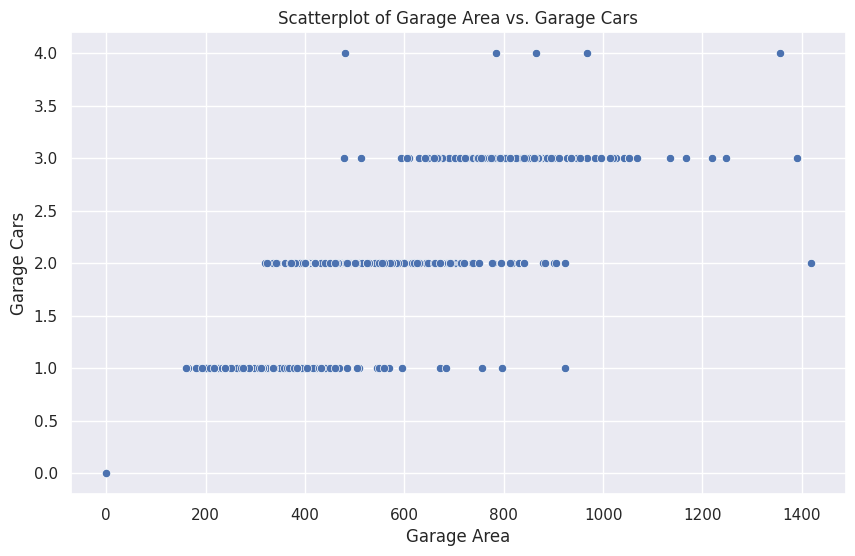

In [ ]:
# scatterplot for mapping correlation between GarageArea and GarageCars
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GarageArea', y='GarageCars', data=df_train)
plt.title('Scatterplot of Garage Area vs. Garage Cars')
plt.xlabel('Garage Area')
plt.ylabel('Garage Cars')
plt.show()

#### YrSold vs SalePrice

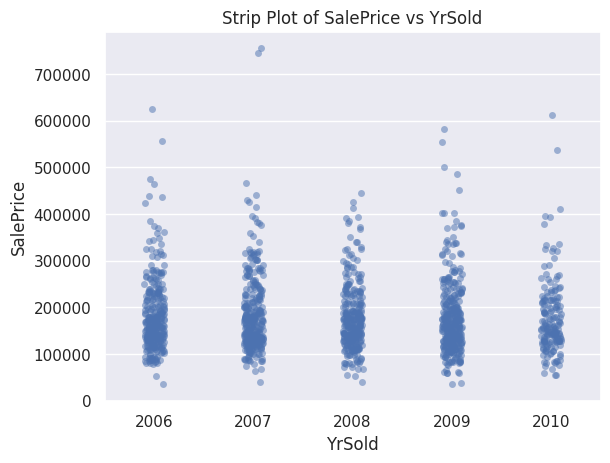

In [ ]:
sns.stripplot(x='YrSold', y='SalePrice', data=df_train, jitter=True, alpha=0.5)
plt.title('Strip Plot of SalePrice vs YrSold')
plt.xlabel('YrSold')
plt.ylabel('SalePrice')
plt.show()

There is data across all years.

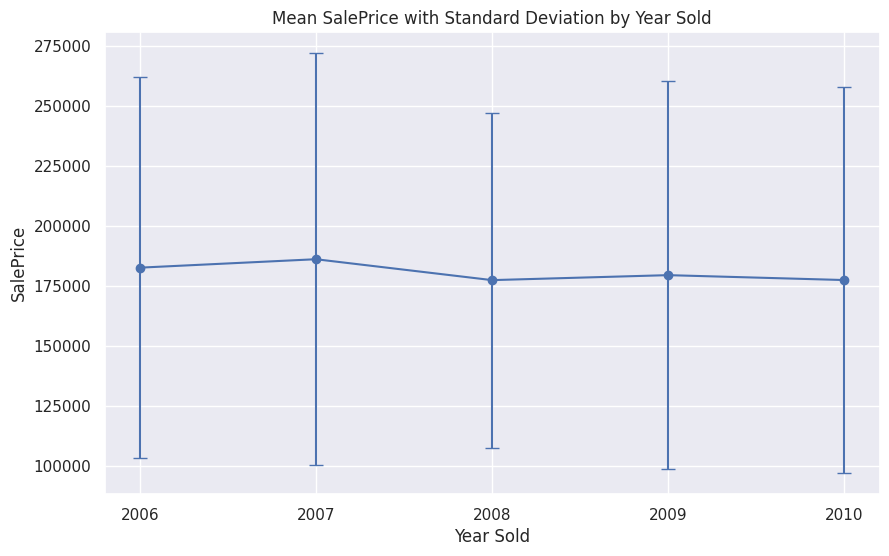

In [ ]:
# Calculate mean and standard deviation of SalePrice for each year
year_stats = df_train.groupby('YrSold')['SalePrice'].agg(['mean', 'std'])

# Create line plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(year_stats.index, year_stats['mean'], yerr=year_stats['std'], fmt='-o', capsize=5)
plt.title('Mean SalePrice with Standard Deviation by Year Sold')
plt.xlabel('Year Sold')
plt.xticks(year_stats.index)
plt.ylabel('SalePrice')
plt.show()

No significant change in SalePrice across years.

SaleCondition vs SalePrice

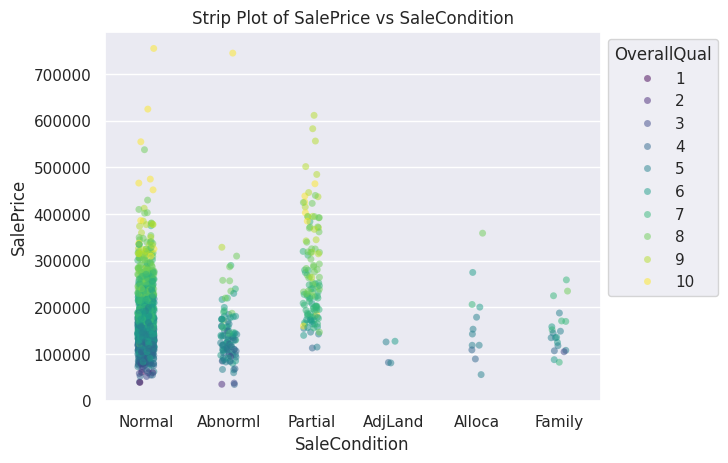

In [ ]:
sns.stripplot(x='SaleCondition', y='SalePrice', data=df_train, jitter=True, alpha=0.5, hue='OverallQual', palette='viridis', legend = 'full')
plt.title('Strip Plot of SalePrice vs SaleCondition')
plt.xlabel('SaleCondition')
plt.ylabel('SalePrice')
sns.move_legend(plt.gca(), "upper left", bbox_to_anchor=(1, 1))
plt.show()

High quality homes tend to be Normal or Partial sales. Very few partial sales are low quality, most are average quality or higher.

#### Average room size
The dataset contains features such as TotRmsAbvGrd and other features that indicate number of rooms but does not provide information on the spaciousness of the house.

In [ ]:
#AvgRmSize provides information on how spacious rooms above ground are.
df_train['AvgRmSize'] = df_train['GrLivArea']/df_train['TotRmsAbvGrd']

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='AvgRmSize', y='SalePrice', hue='OverallQual', data=df_train, palette='viridis', legend = 'full')
plt.title('Average Room Size vs. Sale Price (Color-coded by Overall Quality)')
plt.xlabel('Average Room Size (sqft)')
plt.ylabel('Sale Price')

# Add best fit lines for each OverallQual type
for quality in df_train['OverallQual'].unique():
    sns.regplot(x='AvgRmSize', y='SalePrice', data=df_train[df_train['OverallQual'] == quality],
                scatter=False, color=sns.color_palette('viridis', as_cmap=True)(quality / 10), ci = None)  # Match color to scatterplot

plt.show()

As average room size increases, the overall quality of the house and sale prices of the house increase.

### Scaling

Using the dependent variable, perform both min-max and standard scaling in Python.

#### Min-max scaling SalePrice

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a MinMaxScaler object
minmax_scaler = MinMaxScaler()

# Fit the scaler to the 'SalePrice' column and transform it
df_train['SalePrice_minmax'] = minmax_scaler.fit_transform(df_train[['SalePrice']])

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='SalePrice', y='SalePrice_minmax', data=df_train)
plt.title('SalePrice vs. SalePrice_minmax')
plt.xlabel('SalePrice')
plt.ylabel('SalePrice_minmax')
plt.show()

As expected after scaling SalePrice_minmax and SalePrice have a linear perfect correlation relationship.

#### Standard scaling SalePrice

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a StandardScaler object
standard_scaler = StandardScaler()

# Fit the scaler to the 'SalePrice' column and transform it
df_train['SalePrice_standard'] = standard_scaler.fit_transform(df_train[['SalePrice']])

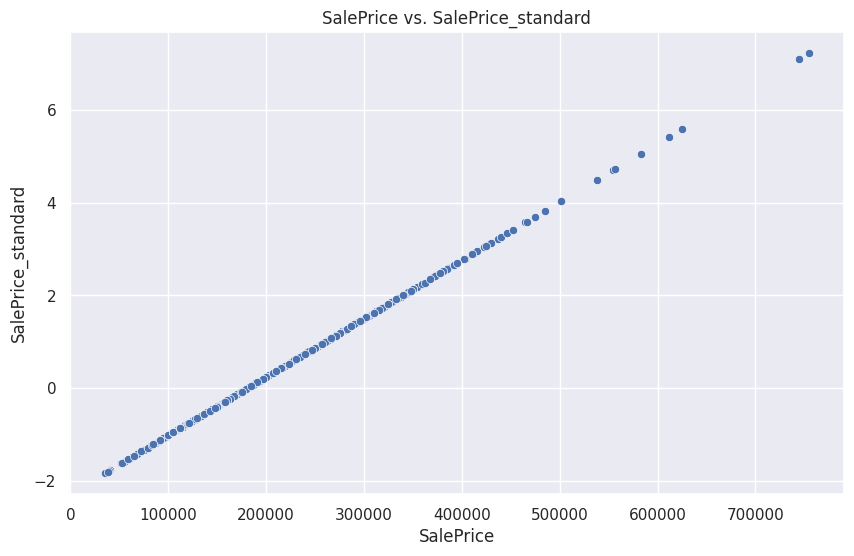

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='SalePrice', y='SalePrice_standard', data=df_train)
plt.title('SalePrice vs. SalePrice_standard')
plt.xlabel('SalePrice')
plt.ylabel('SalePrice_standard')
plt.show()

As expected after scaling SalePrice_minmax and SalePrice have a linear perfect correlation relationship. Since it is standard scaled, the y-axis shows values -2 to 8, showing there is a longer tail on the higher end prices.

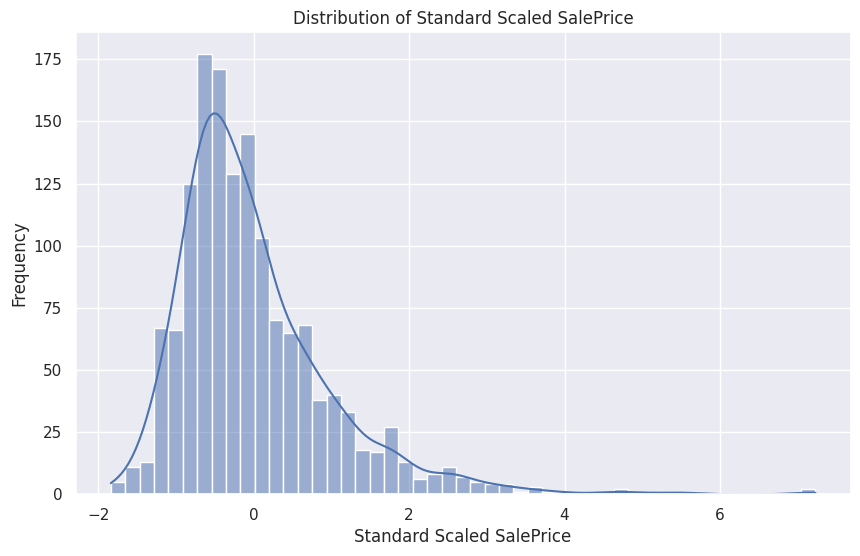

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['SalePrice_standard'], kde=True)  # kde=True adds the curve
plt.title('Distribution of Standard Scaled SalePrice')
plt.xlabel('Standard Scaled SalePrice')
plt.ylabel('Frequency')
plt.show()

*  For normally distributed features it is better to use standard scaling
*  For categorical variables and discrete numeric variables with small number of levels avoiding scaling is best
*  For numeric variables that aren't normally distributed but bounded (clear max value) min-max scaling can be used.

